In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os

In [2]:
df = pd.read_csv(r"F:\csv files\FBMC_16\8.0.csv")

In [3]:
signals = df.values

In [4]:
replicas = signals[:, 1:].reshape((1000, 3625))

In [5]:
pca = PCA(n_components=0.95)  # retain 95% of the variance
pca_signals = pca.fit_transform(replicas)

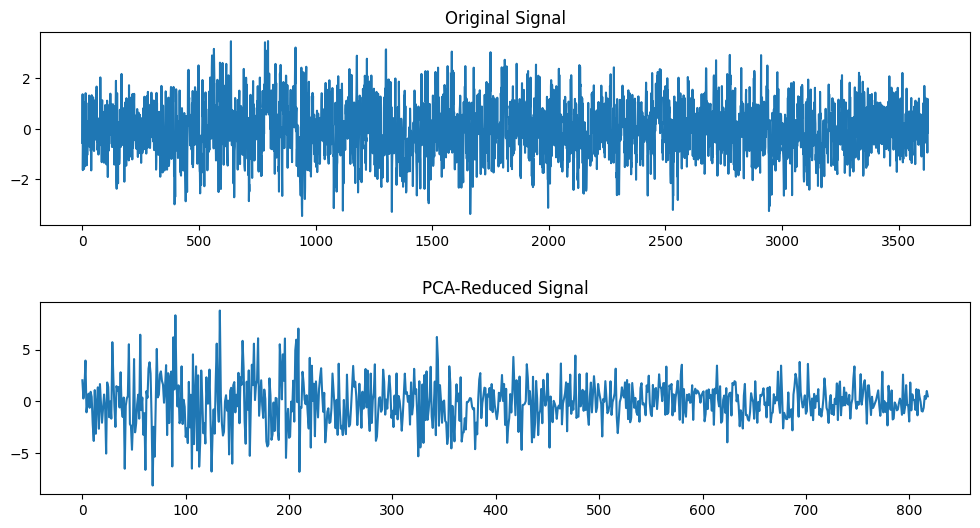

In [8]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Explained variance ratio')
# plt.title('PCA Explained Variance Ratio')
# plt.show()

# Plot the original and PCA-reduced signals
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(signals[0, :])
ax[0].set_title('Original Signal')
ax[1].plot(pca_signals[0, :])
ax[1].set_title('PCA-Reduced Signal')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [33]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

base = r"F:\csv files"
for folder in os.listdir(base):
    file_path = os.path.join(base, folder)
    snr = [0.0]
    for j in snr:
        path = os.path.join(file_path, f"{j}.csv")
        
        data = np.genfromtxt(path, delimiter=",", skip_header=1)
        if folder == "WOLA_QAM16" or folder == "WOLA_QAM64" or folder == "FOFDM_QAM16" or folder == "FOFDM_QAM64":
            num_subframes = 3626
        else:
            num_subframes = 3625
        feature_names = data.shape[1]
        
        n_components=800
        pca = PCA(n_components=n_components)  # retain 95% of the variance
        pca_signals = pca.fit_transform(data)
        
        # Create output directory
        output_directory = os.path.join("F:/spectogram3", str(j), folder)
        os.makedirs(output_directory, exist_ok=True)
        
        # Save pca_signals to a CSV file
        pca_file_path = os.path.join(output_directory, f"pca_signals_{j}.csv")
        pd.DataFrame(pca_signals).to_csv(pca_file_path, index=False)
        print(f"PCA signals saved to {pca_file_path}")

PCA signals saved to F:/spectogram3\0.0\FBMC_16\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\FBMC_64\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\FOFDM_QAM16\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\FOFDM_QAM64\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\OFDM_QAM16\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\OFDM_QAM64\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\UFMC_QAM16\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\UFMC_QAM64\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\WOLA_QAM16\pca_signals_0.0.csv
PCA signals saved to F:/spectogram3\0.0\WOLA_QAM64\pca_signals_0.0.csv
